In [1]:
%matplotlib notebook
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import random

from mpl_toolkits.mplot3d import Axes3D

DATA_PATH = '../matlab/TMS/Max_Power_top_corr.mat'

In [2]:
def get_data_from_mat():
#     training_data = []
    data = scipy.io.loadmat(DATA_PATH)
    print(data.keys())
    x = data['maxpow_top']
    feat = data['features']
    top_feat = data['top_feats']
    return x

<IPython.core.display.Javascript object>


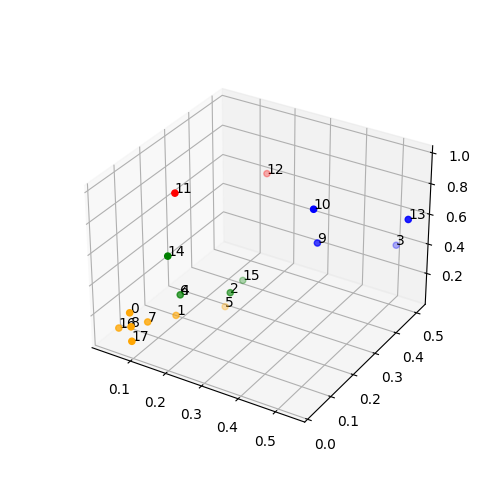

dict_keys(['__header__', '__version__', '__globals__', 'features', 'maxpow_top', 'top_feats'])
[3 3 1 2 1 3 1 3 3 2 2 0 0 2 1 1 3 3]


In [6]:
k = 4
colors = ['red', 'green', 'blue', 'orange', 'purple']
e = 3
s = 5
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
plotting = {}
dataset = get_data_from_mat()
kmeans = KMeans(n_clusters=k)
dbscan = DBSCAN(eps=e, min_samples=s)
# Comparing top 3 features
slice0 = 9
slice1 = 10
slice2 = 11
slice3 = 12
indices = slice(slice0,slice3)
k_results = kmeans.fit_predict(dataset[:,indices])
# Creating labels for 18 subjects
labels = [str(x) for x in range(18)]
print(k_results)
for c in range(k):
    plotting.setdefault(c, []).append(dataset[np.where(k_results==c),indices])
for c in range(k):
    ax.scatter(plotting[c][0][0][:,0],
               plotting[c][0][0][:,1],
               plotting[c][0][0][:,2], 
               color=colors[c])
for i, label in enumerate(labels):
    ax.text(dataset[i,slice0], dataset[i,slice1], dataset[i,slice2], label)